<a href="https://colab.research.google.com/github/mimkd13/PersianText-SA-DL/blob/main/Digikala_Ex4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment Description:**  
This code is part of a thesis-related experiment that focuses on sentiment analysis of Digikala website user comments. The process begins by preprocessing the comments to ensure clean and uniform textual data. Following this, FastText embeddings are generated to represent words within a meaningful vector space. Finally, the sentiment classification task leverages both CNN and LSTM neural network architectures to accurately capture and interpret the expressed sentiments.


**1. Importing Libraries**

**Description:**  
In this section, we first install the required libraries, then we import them in separate blocks for better organization. Additionally, short comments are provided for each library to clarify their usage.  
- First, we install and import Persian NLP libraries (`hazm`, `dadmatools`).  
- Then, we import general-purpose libraries for data science, machine learning, and text processing.  
- If needed, we install `fasttext` in a separate block.


In [2]:
# Installing Persian NLP libraries
!pip install hazm
!pip install dadmatools

# Installing fasttext if needed
!pip install fasttext

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 17.1 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9298 sha256=8c8e4816364b38193441dc66e4e1b8e1cd5ade7e06b845682833165e84abedea
  Stored in directory: /root/.cache/pip/wheels/49/20/47/f03dfa8a7239c54cbc44ff7389eefbf888d2c1873edaaec888
Successfully built flashtext
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviou

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 45.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of dadmatools to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.4/427.4 kB 29.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.4/891.4 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.9/457.9 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 kB 7.0 MB/s eta 0:

In [3]:
# Importing Persian NLP libraries
import hazm           # For Persian NLP tasks (tokenization, normalization, stemming, etc.)
import dadmatools     # Persian NLP toolkit with extended features compared to hazm


In [4]:
# Importing general-purpose libraries
import numpy as np                  # Numerical and matrix computations
import nltk                         # Natural Language Processing (primarily English)
import re                           # Regular expressions for pattern matching
import string                       # String processing utilities
import warnings                     # Managing and displaying warnings
import gensim                       # Topic modeling, word embeddings, and NLP tasks
from gensim.models import Doc2Vec   # Doc2Vec model for document embeddings
from sklearn.metrics.pairwise import cosine_similarity  # Compute cosine similarity between vectors
from configparser import ConfigParser                  # Parse configuration files
from functools import reduce                           # Apply a reducing function over a list
import pandas as pd                                    # Data analysis and DataFrame manipulation


In [5]:
# Cloning the official fastText repository (Optional)
# This step is not strictly required to run FastText, but it may be useful for reference.
!git clone https://github.com/facebookresearch/fastText.git

# Downloading a pre-trained Persian FastText model
# This gives you a pre-trained embedding for Persian words.
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fa.300.bin.gz

# Decompressing the downloaded model file
!gunzip cc.fa.300.bin.gz


Cloning into 'fastText'...
remote: Enumerating objects: 3998, done.
remote: Counting objects: 100% (995/995), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 3998 (delta 886), reused 824 (delta 824), pack-reused 3003 (from 2)
Receiving objects: 100% (3998/3998), 8.30 MiB | 29.83 MiB/s, done.
Resolving deltas: 100% (2527/2527), done.
--2025-02-16 08:41:35--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fa.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.14, 3.163.189.96, 3.163.189.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4502524724 (4.2G) [application/octet-stream]
Saving to: ‘cc.fa.300.bin.gz’

cc.fa.300.bin.gz    100%[===================>]   4.19G   237MB/s    in 38s     

2025-02-16 08:42:12 (114 MB/s) - ‘cc.fa.300.bin.gz’ saved [4502524724/4502524724]



In [6]:
import fasttext

# Loading the pre-trained FastText model
# 'cc.fa.300.bin' is the Persian FastText embeddings file
ft = fasttext.load_model('cc.fa.300.bin')

# Example usage: Find the nearest neighbors to the given Persian phrase
neighbors = ft.get_nearest_neighbors('هوش مصنوعی')
print(neighbors)


[(0.8088415861129761, 'هوشمصنوعی'), (0.7026421427726746, 'شیرمصنوعی'), (0.701546311378479, 'ومصنوعی'), (0.7009400725364685, 'نورمصنوعی'), (0.6918334364891052, 'نیمه\u200cمصنوعی'), (0.6630370020866394, 'صنوعی'), (0.5502080321311951, 'مصنوعیگل'), (0.5443315505981445, 'مصنوعی2013'), (0.5439041256904602, 'منتظریان'), (0.5428822040557861, 'مصنوعیشوفر')]


**2. Loading the Dataset**

In [7]:
try:
    # Loading the dataset from a CSV file with UTF-8 encoding
    data = pd.read_csv('/content/drive/MyDrive/Notebooks/digikala.csv', encoding='utf-8')
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")

Data loaded successfully.


In [8]:
import re

# Preprocessing: Convert all non-string values in 'comment' column to empty strings
data['comment'] = data['comment'].apply(lambda x: x if isinstance(x, str) else '')

# 1. Number of columns
num_columns = data.shape[1]

# 2. Number of rows
num_rows = data.shape[0]

# 3. Number of empty rows
num_empty_rows = data['comment'].isnull().sum() + (data['comment'].str.strip() == '').sum()

# 4. Number of rows containing only emoji characters
emoji_pattern = re.compile(r'^[\U0001F600-\U0001F64F\s]+$')
num_emoji_only_rows = data['comment'].apply(lambda x: bool(emoji_pattern.fullmatch(x.strip()))).sum()

# 5. Number of rows containing only English characters
english_pattern = re.compile(r'^[A-Za-z\s]+$')
num_english_only_rows = data['comment'].apply(lambda x: bool(english_pattern.fullmatch(x.strip()))).sum()

# 6. Number of duplicate rows based on the 'comment' column
num_duplicate_rows = data.duplicated(subset='comment').sum()

# 7. Number of rows with less than 50 characters
num_less_than_50_chars = data['comment'].str.len().lt(50).sum()

# 8. Number of rows containing a mention (@ followed by an identifier)
mention_pattern = re.compile(r'@\w+')
num_rows_with_mentions = data['comment'].apply(lambda x: bool(mention_pattern.search(x))).sum()

# 9. Number of rows where the 'type' column has the value 'caption'
#num_caption_rows = data[data['type'] == 'caption'].shape[0]

# 10. Number of rows containing hashtags (# followed by an identifier)
hashtag_pattern = re.compile(r'#\w+')
num_rows_with_hashtags = data['comment'].apply(lambda x: bool(hashtag_pattern.search(x))).sum()

# Display the updated results
results = {
    "Total Columns": num_columns,
    "Total Rows": num_rows,
    "Empty Rows": num_empty_rows,
    "Emoji-only Rows": num_emoji_only_rows,
    "English-only Rows": num_english_only_rows,
    "Duplicate Rows": num_duplicate_rows,
    "Rows with less than 50 characters": num_less_than_50_chars,
    "Rows with mentions (@)": num_rows_with_mentions,
    #"Rows with 'caption' in type": num_caption_rows,
    "Rows with hashtags (#)": num_rows_with_hashtags
}

results


{'Total Columns': 14,
 'Total Rows': 65535,
 'Empty Rows': 101,
 'Emoji-only Rows': 0,
 'English-only Rows': 1,
 'Duplicate Rows': 2381,
 'Rows with less than 50 characters': 20343,
 'Rows with mentions (@)': 2,
 'Rows with hashtags (#)': 31}

**3. Preprocessing and Prepairing the Data**




In [9]:
# Filtering out rows with label = 1
data = data[data['label'] != 1]

# Replacing label = 2 with 1
data.loc[data['label'] == 2, 'label'] = 1

# Splitting the data by label (1 and 0)
data_label_1 = data[data['label'] == 1]
data_label_0 = data[data['label'] == 0]

# Ensuring an equal number of samples for each label, up to 5000 per label
num_samples_per_label = min(len(data_label_1), len(data_label_0), 20000)

# Randomly sampling equal subsets from each label category
data_label_1 = data_label_1.sample(num_samples_per_label, random_state=42)
data_label_0 = data_label_0.sample(num_samples_per_label, random_state=42)

# Combining the balanced subsets into the final dataset
final_data = pd.concat([data_label_1, data_label_0]).reset_index(drop=True)

# Removing rows with NaN or empty values in the 'comment' column
final_data = final_data.dropna(subset=['comment'])
final_data = final_data[final_data['comment'].str.strip() != '']

# Checking the final dataset size
print(final_data.shape)

# Displaying a preview of the final dataset
final_data.head()


(36140, 14)


,id,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,label,advantages,disadvantages
0,"65,280","778,325",چاقو سفری کلد استیل مدل TANTO,TS,"6,864,141",2,0,verified,recommended,ارزش خریدداره,ازاینکه این مبلغودرقبال خریداین چاقوپرداخت کرد...,1.0,"[""زیبا.مستحکم.خوش دست.باکیفیت.اصل.""]","[""بعلت اصل بودن کالاتیغه تیزنمیباشد.""]"
1,"70,415","529,992",محافظ صفحه نمایش شیشه ای تمپرد هوکار مناسب Hu...,AC,"764,369",1,0,verified,not_recommended,فاقد کارایی,این کاور برای گوشی P10 lite نبود و تمام صفحه ...,1.0,NaN,NaN
2,"47,866","786,887",شکلات خوری وینیکا مدل گلس گلد کوتاه,HW,"915,891",0,0,verified,not_recommended,اصلا پیشنهاد نمیکنم,من همین مدل عکس رو خواستم ولی ی شیرینی خوری بر...,1.0,NaN,NaN
3,"61,446","476,001",شانه ضد شپش لیندا نیت مدل تمام استیل پاک کننده...,PC,"8,271,122",6,1,verified,recommended,کیفیت و کارایی شانه لیندا نیت,محصول خیلی خوبیه انصافا و موثره جنس دندانه های...,1.0,"[""کیفیت و کارایی""]",NaN
4,"70,203","565,054",لامپ ال ای دی 15 وات بروکس مدل A70 پایه E27,TC,"701,334",5,14,verified,recommended,خیلی خوب,نمیدونم چرا دوستان در ارائه نظر نا انصافی میکن...,1.0,NaN,NaN


In [10]:
# Creating a new DataFrame with only 'comment' and 'label' columns
final_data_filtered = final_data[['comment', 'label']]

# Displaying the final filtered DataFrame
final_data_filtered.head()

,comment,label
0,ازاینکه این مبلغودرقبال خریداین چاقوپرداخت کرد...,1.0
1,این کاور برای گوشی P10 lite نبود و تمام صفحه ...,1.0
2,من همین مدل عکس رو خواستم ولی ی شیرینی خوری بر...,1.0
3,محصول خیلی خوبیه انصافا و موثره جنس دندانه های...,1.0
4,نمیدونم چرا دوستان در ارائه نظر نا انصافی میکن...,1.0


In [11]:
# Counting the number of samples for each label
label_counts = final_data_filtered['label'].value_counts()

# Printing the count of samples per label
print(label_counts)

label
0.0    18072
1.0    18068
Name: count, dtype: int64


**4. Preprocessing**

**Normalization**

In [12]:
# Converting all values in the 'comment' column to strings to avoid AttributeError
final_data_filtered['comment'] = final_data_filtered['comment'].astype(str)

# Using the hazm library for text normalization
try:
    from hazm import Normalizer
    normalizer = Normalizer()
    # Applying the normalizer to the 'comment' column
    final_data_filtered['normalized_text'] = final_data_filtered['comment'].apply(normalizer.normalize)
except ImportError:
    # If hazm is not available in the current environment
    final_data_filtered['normalized_text'] = "Hazm library not available in this environment"

# Keeping only the 'comment', 'normalized_text', and 'label' columns in the final DataFrame
data_normalized = final_data_filtered[['comment', 'normalized_text', 'label']]

# Displaying the final DataFrame
data_normalized.head()


<ipython-input-12-df212a4ce25b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data_filtered['comment'] = final_data_filtered['comment'].astype(str)
<ipython-input-12-df212a4ce25b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data_filtered['normalized_text'] = final_data_filtered['comment'].apply(normalizer.normalize)


,comment,normalized_text,label
0,ازاینکه این مبلغودرقبال خریداین چاقوپرداخت کرد...,ازاینکه این مبلغودرقبال خریداین چاقوپرداخت کرد...,1.0
1,این کاور برای گوشی P10 lite نبود و تمام صفحه ...,این کاور برای گوشی P ۱۰ lite نبود و تمام صفحه ...,1.0
2,من همین مدل عکس رو خواستم ولی ی شیرینی خوری بر...,من همین مدل عکس رو خواستم ولی‌ی شیرینی خوری بر...,1.0
3,محصول خیلی خوبیه انصافا و موثره جنس دندانه های...,محصول خیلی خوبیه انصافا و موثره جنس دندانه‌های...,1.0
4,نمیدونم چرا دوستان در ارائه نظر نا انصافی میکن...,نمیدونم چرا دوستان در ارائه نظر نا انصافی می‌ک...,1.0


**Tokenization**

In [13]:
import pandas as pd
from hazm import WordTokenizer

# List to store tokens and labels
tokenized_data = []

# Initializing the tokenizer
word_tokenizer = WordTokenizer()

# Tokenizing the 'normalized_text' column and storing results
for index, row in data_normalized.iterrows():
    tokens = word_tokenizer.tokenize(row['normalized_text'])
    label = row['label']
    tokenized_data.append({'tokens': tokens, 'label': label})

# Creating a new DataFrame with tokens and labels
tokenized_df = pd.DataFrame(tokenized_data)

# Displaying the resulting DataFrame
print(tokenized_df.head())


                                              tokens  label
0  [ازاینکه, این, مبلغودرقبال, خریداین, چاقوپرداخ...    1.0
1  [این, کاور, برای, گوشی, P, ۱۰, lite, نبود, و, ...    1.0
2  [من, همین, مدل, عکس, رو, خواستم, ولی‌ی, شیرینی...    1.0
3  [محصول, خیلی, خوبیه, انصافا, و, موثره, جنس, دن...    1.0
4  [نمیدونم, چرا, دوستان, در, ارائه, نظر, نا, انص...    1.0


In [14]:
tokenized_df

,tokens,label
0,"[ازاینکه, این, مبلغودرقبال, خریداین, چاقوپرداخ...",1.0
1,"[این, کاور, برای, گوشی, P, ۱۰, lite, نبود, و, ...",1.0
2,"[من, همین, مدل, عکس, رو, خواستم, ولی‌ی, شیرینی...",1.0
3,"[محصول, خیلی, خوبیه, انصافا, و, موثره, جنس, دن...",1.0
4,"[نمیدونم, چرا, دوستان, در, ارائه, نظر, نا, انص...",1.0
...,...,...
36135,"[چیز, خاصی, نیست]",0.0
36136,"[شارژخوبی, اصلا, نبود, و, قیمتش, نمی‌ارزید]",0.0
36137,"[کالا, مرجوع, شد, ., کیفیت, اصلا, خوب, نبود, .]",0.0
36138,"[من, حدود, ۱, سال, پیش, این, پاوربانک, رو, خری...",0.0


**Lemmatization**

In [15]:
import pandas as pd
from hazm import Lemmatizer

# Initializing the lemmatizer
lemmatizer = Lemmatizer()

# List to store lemmatized tokens and labels
lemmatized_data = []

# Applying the lemmatizer to each token in the dataset
for index, row in tokenized_df.iterrows():
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in row['tokens']]
    label = row['label']
    lemmatized_data.append({'lemmatized_tokens': lemmatized_tokens, 'label': label})

# Creating a new DataFrame with the lemmatized tokens and labels
lemmatized_df = pd.DataFrame(lemmatized_data)

# Displaying the first few rows of the new DataFrame
print(lemmatized_df.head())


                                   lemmatized_tokens  label
0  [ازاینکه, این, مبلغودرقبال, خریداین, چاقوپرداخ...    1.0
1  [این, کاور, برای, گوشید#گوش, P, ۱۰, lite, بود#...    1.0
2  [من, همین, مدل, عکس, رو, خواست#خواه, ولی, شیری...    1.0
3  [محصول, خیلی, خوبیه, انصافا, و, موثره, جنس, دن...    1.0
4  [نمیدونم, چرا, دوستان, در, ارائه, نظر, نا, انص...    1.0


In [16]:
lemmatized_df

,lemmatized_tokens,label
0,"[ازاینکه, این, مبلغودرقبال, خریداین, چاقوپرداخ...",1.0
1,"[این, کاور, برای, گوشید#گوش, P, ۱۰, lite, بود#...",1.0
2,"[من, همین, مدل, عکس, رو, خواست#خواه, ولی, شیری...",1.0
3,"[محصول, خیلی, خوبیه, انصافا, و, موثره, جنس, دن...",1.0
4,"[نمیدونم, چرا, دوستان, در, ارائه, نظر, نا, انص...",1.0
...,...,...
36135,"[چیز, خاصی, نیست]",0.0
36136,"[شارژخوبی, اصلا, بود#است, و, قیمت, ارزید#ارز]",0.0
36137,"[کالا, مرجوع, شد#شو, ., کیفیت, اصلا, خوب, بود#...",0.0
36138,"[من, حدود, ۱, سال, پیش, این, پاوربانک, رو, خری...",0.0


**5. Token Indexing and Sequence Padding**

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Extracting lemmatized tokens from lemmatized_df
texts = lemmatized_df['lemmatized_tokens'].values

# Building a vocabulary dictionary
word_index = {}
index = 1
for tokens in texts:
    for token in tokens:
        if token not in word_index:
            word_index[token] = index
            index += 1

# Displaying the size of the vocabulary
vocab_size = len(word_index) + 1
print('Vocab size: {}'.format(vocab_size))

# Converting tokens into numeric sequences
encoded_texts = [[word_index[token] for token in tokens] for tokens in texts]

# Padding sequences to a fixed length
sentences_max_length = 50  # Maximum sentence length (adjustable)
padded_sequence = pad_sequences(encoded_texts, maxlen=sentences_max_length, padding='post')

# Adding the padded sequences to the DataFrame
lemmatized_df['padded_sequence'] = list(padded_sequence)

# Displaying final information
print('Number of padded sequences and its shape:')
print(padded_sequence.shape)
lemmatized_df.head()


Vocab size: 29278
Number of padded sequences and its shape:
(36140, 50)


,lemmatized_tokens,label,padded_sequence
0,"[ازاینکه, این, مبلغودرقبال, خریداین, چاقوپرداخ...",1.0,"[10, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3..."
1,"[این, کاور, برای, گوشید#گوش, P, ۱۰, lite, بود#...",1.0,"[2, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67..."
2,"[من, همین, مدل, عکس, رو, خواست#خواه, ولی, شیری...",1.0,"[48, 71, 72, 73, 74, 75, 51, 76, 77, 78, 79, 8..."
3,"[محصول, خیلی, خوبیه, انصافا, و, موثره, جنس, دن...",1.0,"[86, 16, 87, 88, 64, 89, 90, 91, 92, 93, 94, 9..."
4,"[نمیدونم, چرا, دوستان, در, ارائه, نظر, نا, انص...",1.0,"[110, 111, 112, 113, 114, 115, 116, 117, 6, 11..."


**6. Splitting Data into Training and Testing Sets**

In [18]:
from sklearn.model_selection import train_test_split

# Preparing data and labels
X = padded_sequence  # Padded sequences
y = lemmatized_df['label'].values  # Labels

# Splitting the dataset into training and testing sets
# test_size=0.3 means 30% of the data goes to the test set
# shuffle=True to randomize the samples before splitting
# random_state=42 for reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Displaying the shape of each subset
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (25298, 50)
Shape of X_test: (10842, 50)
Shape of y_train: (25298,)
Shape of y_test: (10842,)


In [19]:
sentences_max_length = 70
lstm_units = 50

**7. Constructing the Embedding Matrix**

In [20]:
import numpy as np

# Number of words in the vocabulary and embedding vector size
embedding_dim = 300  # Usually 300-dimensional
vocab_size = len(word_index) + 1  # Derived from the word_index dictionary

# Initializing the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Constructing the embedding matrix using the FastText model
for word, i in word_index.items():
    embedding_vector = ft.get_word_vector(word)  # Retrieve the embedding vector for the word
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector  # Add the embedding vector to the matrix

# Displaying information about the embedding matrix
print(f"Embedding matrix shape: {embedding_matrix.shape}")


Embedding matrix shape: (29278, 300)


**8. Building and Compiling the Model**

In [21]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split  # Optional, if needed for further splitting

# Defining model architecture
model = Sequential()
embedding_vector_length = 300

# Embedding layer:
# - vocab_size: the size of the vocabulary
# - embedding_vector_length: the dimension of the embedding vector
# - input_length: the maximum length of input sequences
# - weights: the embedding matrix created from FastText word vectors
# - trainable=True: allows the embedding weights to be fine-tuned during training
model.add(Embedding(vocab_size, embedding_vector_length, input_length=sentences_max_length, weights=[embedding_matrix], trainable=True))

# SpatialDropout1D applies dropout to the embeddings, helping prevent overfitting
model.add(SpatialDropout1D(0.7))

# LSTM layer:
# - lstm_units: the number of units (memory cells) in the LSTM layer
# - dropout: fraction of units to drop for the input gate
# - recurrent_dropout: fraction of units to drop for the recurrent state
model.add(LSTM(lstm_units, dropout=0.5, recurrent_dropout=0.5))

# Additional dropout layer for further regularization
model.add(Dropout(0.2))

# Dense output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compiling the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Printing the model summary to review layers and parameters
print(model.summary())


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │       8,783,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,783,400 (33.51 MB)

 Trainable params: 8,783,400 (33.51 MB)

 Non-trainable params: 0 (0.00 B)

None


**9. Training the Model**

**LSTM**

In [22]:
# Training the model with the training data
# - X_train and y_train are the features and labels for training
# - batch_size: number of samples per gradient update
# - epochs: number of passes through the entire training dataset
# - validation_split: fraction of training data to be used as validation set
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 160s 243ms/step - accuracy: 0.5099 - loss: 0.6945 - val_accuracy: 0.5132 - val_loss: 0.6914
Epoch 2/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 198s 237ms/step - accuracy: 0.5157 - loss: 0.6922 - val_accuracy: 0.5188 - val_loss: 0.6875
Epoch 3/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 148s 234ms/step - accuracy: 0.5312 - loss: 0.6840 - val_accuracy: 0.7484 - val_loss: 0.5795
Epoch 4/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 203s 235ms/step - accuracy: 0.7192 - loss: 0.5861 - val_accuracy: 0.8221 - val_loss: 0.4534
Epoch 5/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 151s 239ms/step - accuracy: 0.8000 - loss: 0.4877 - val_accuracy: 0.8387 - val_loss: 0.4059
Epoch 6/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 203s 241ms/step - accuracy: 0.8372 - loss: 0.4054 - val_accuracy: 0.8506 - val_loss: 0.3713
Epoch 7/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 201s 240ms/step - accuracy: 0.8642 - loss: 0.3551 - val_accuracy: 0.8553 - val_loss: 0.3566
Epoch 8/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 200s 238ms/step - accuracy: 0.8774 -

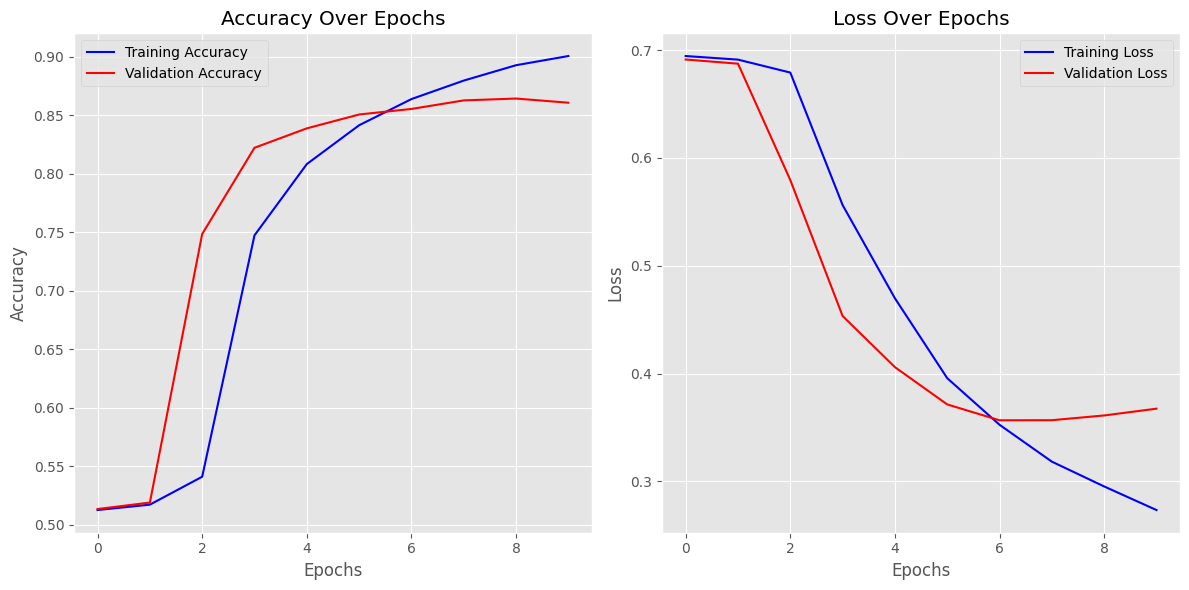

In [23]:
import matplotlib.pyplot as plt

# Use ggplot style
plt.style.use('ggplot')

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'b-', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b-', label='Training Loss')
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [24]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Assuming `model` has been trained and X_test, y_test are defined

# Predict on the test set
y_pred_probs = model.predict(X_test)  # Predict probabilities
y_pred_classes = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to class labels (threshold = 0.5)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Detailed classification report
report = classification_report(y_test, y_pred_classes)
print("\nClassification Report:")
print(report)


339/339 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step
Accuracy: 0.85
Precision: 0.85
Recall: 0.86
F1-Score: 0.85

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      5415
         1.0       0.85      0.86      0.85      5427

    accuracy                           0.85     10842
   macro avg       0.85      0.85      0.85     10842
weighted avg       0.85      0.85      0.85     10842



In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

# Model predictions on test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert output to binary predictions (for binary model)

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# 3. Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# 4. F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# 5. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


339/339 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step
Accuracy: 0.8529
Precision: 0.8471
Recall: 0.8616
F1 Score: 0.8543
Confusion Matrix:
[[4571  844]
 [ 751 4676]]


**CNN**

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Initializing a sequential model
model = Sequential()

# Embedding layer with fine-tuning enabled
model.add(Embedding(
    vocab_size,
    embedding_dim,
    input_length=sentences_max_length,
    weights=[embedding_matrix],
    trainable=True
))

# Conv1D layer with reduced filters and L2 regularization
model.add(Conv1D(
    32,  # Reduced number of filters from 64 to 32
    5,
    activation='relu',
    kernel_regularizer=l2(0.05)  # Increased L2 regularization
))

# Batch normalization to stabilize and accelerate training
model.add(BatchNormalization())

# GlobalMaxPooling1D to extract the most significant features
model.add(GlobalMaxPooling1D())

# Dropout layer to prevent overfitting
model.add(Dropout(0.3))  # Increased dropout rate from 0.2 to 0.3

# Dense layer with higher L2 regularization and reduced units
model.add(Dense(
    16,  # Reduced the number of units from 32 to 16
    activation='relu',
    kernel_regularizer=l2(0.05)  # Increased L2 regularization
))

# Another dropout layer for additional regularization
model.add(Dropout(0.3))  # Increased dropout rate from 0.2 to 0.3

# Output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Adam optimizer with a reduced learning rate
optimizer = Adam(learning_rate=0.0003)  # Reduced learning rate

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,  # Reduced patience for quicker stopping
    restore_best_weights=True
)

# Training the model
history = model.fit(
    X_train,
    y_train,
    validation_split=0.3,
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 91s 158ms/step - accuracy: 0.5716 - loss: 3.8235 - val_accuracy: 0.8157 - val_loss: 1.5793
Epoch 2/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 143s 159ms/step - accuracy: 0.7850 - loss: 1.2853 - val_accuracy: 0.8501 - val_loss: 0.7613
Epoch 3/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 142s 160ms/step - accuracy: 0.8387 - loss: 0.7189 - val_accuracy: 0.8594 - val_loss: 0.5441
Epoch 4/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 141s 158ms/step - accuracy: 0.8715 - loss: 0.5223 - val_accuracy: 0.8598 - val_loss: 0.4747
Epoch 5/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 87s 158ms/step - accuracy: 0.8920 - loss: 0.4309 - val_accuracy: 0.8553 - val_loss: 0.4573
Epoch 6/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 86s 156ms/step - accuracy: 0.9106 - loss: 0.3706 - val_accuracy: 0.8480 - val_loss: 0.4633
Epoch 7/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 148s 166ms/step - accuracy: 0.9208 - loss: 0.3408 - val_accuracy: 0.8538 - val_loss: 0.4569
Epoch 8/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 87s 158ms/step - accuracy: 0.9386 - los

In [27]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set
y_pred_probs = model.predict(X_test)  # Predict probabilities
y_pred_classes = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to class labels (threshold = 0.5)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Detailed classification report
report = classification_report(y_test, y_pred_classes)
print("\nClassification Report:")
print(report)


339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1-Score: 0.85

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      5415
         1.0       0.85      0.85      0.85      5427

    accuracy                           0.85     10842
   macro avg       0.85      0.85      0.85     10842
weighted avg       0.85      0.85      0.85     10842



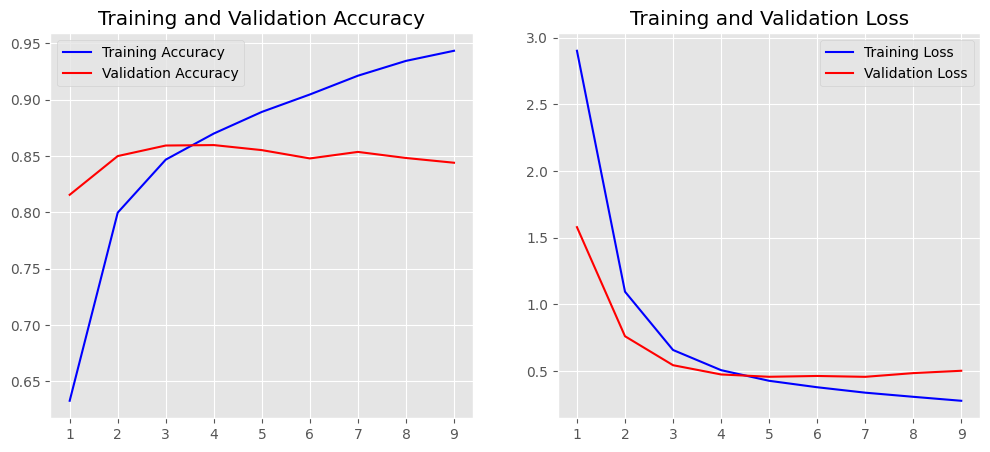

In [28]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    """
    Plots the training and validation accuracy/loss for each epoch.

    Parameters:
    history: The training history object containing accuracy and loss metrics.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training Loss')
    plt.plot(x, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

# Displaying the training history of the CNN model
plot_history(history)


In [29]:
# Evaluating the CNN model on the test dataset
test_loss, test_accuracy = model_cnn.evaluate(X_test, y_test, verbose=1)

# Displaying the evaluation results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


NameError: name 'model_cnn' is not defined

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

# Model predictions on test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert output to binary predictions (for binary model)

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# 3. Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# 4. F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# 5. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Accuracy: 0.8504
Precision: 0.8528
Recall: 0.8474
F1 Score: 0.8501
Confusion Matrix:
[[4621  794]
 [ 828 4599]]
